# Supervised Learning

Sections
* [Supervised Learning in python](#supervised_learning_python)
* [Classification](#classification)
* [Measuring Model Performance](#measuring_model_performance)
* [Selecting the best model - Model complexity/hyperparameters](#model_complexity_hyperparameters)
* [Learning Curve](#learning_curves)

based on [datacamp's supervised learning in python with scikit learn course](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn) and [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) Jake VanderPlas

### **unsupervised learning** : uses unlabelled data

uncovering hidden patterns and structures from unlabelled data

* **clustering** - finding groups/patterns in unlabled data (not just clustered points but also things like isolating 2 seperate audio sources in a sound recording [music and a person speaking for example])
* **model reduction** - finding and isolating which features are important in predicting the target
* **Reinforcement learning** - learn how to optimise behaviour given system of rewards and punishments - used for AlphaGo


### **supervised learning** : uses labelled data

We have datapoints described using *predictor variables* (also known as *features* or *independant variables*) and a *target variable* (also known as *response variable* or *dependant variable*)

##### Learning Tasks:
* **Classification** : target variable consists of categories (categorical variable)
* **Regression** : target variable is continous

Supervised learning is commonly used to either:

* *automate a time-consuming or expensive manual task*
* *make predictions about the future*

<a id='supervised_learning_python'></a>
## Supervised Learning in Python

libraries for supervised learning in python:
* scikit-learn
* TensorFlow
* keras

### The Irdis dataset

In [24]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
iris = datasets.load_iris()

In [10]:
features = iris.data
target = iris.target

In [18]:
df = pd.DataFrame(features, columns=iris.feature_names)

In [22]:
df[0:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Targets are categorical variables, the species of iris, either  'setosa', 'versicolor' or 'virginica' and are encoded with 0, 1 or 2 respectively.

In [42]:
target[0:3]

array([0, 0, 0])

In [43]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

### Visual EDA (Exploratory Data Analysis)

###### Lets look at the scatter matrix for this data

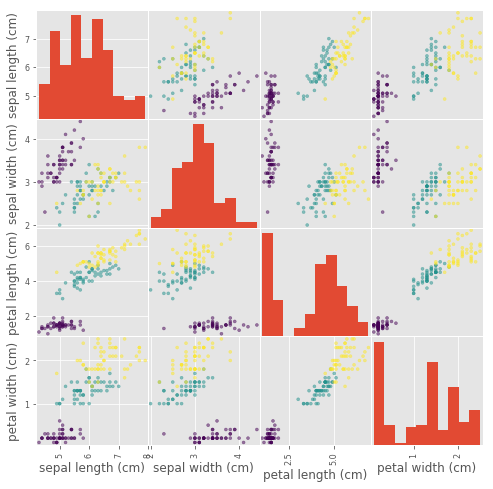

In [26]:
_ = pd.scatter_matrix(df, c=target, figsize=[8, 8])

We can see that petal length and width appear to be correlated and a grouped by species.

<a id='classification'></a>
## Classification

### Classifing with KNN

We want to build a *classifier* that takes unlabeled data as input and outputs labeled data.

We'll choose a simple algorithm to classify some data called k-Nearest Neighbours (KNN). The basic idea is to predict the label of any datapoint by looking at the $k$ closest labelled data points and getting them to taking a majority 'vote' on what label the unlabeled point should have.

Basically it creates regions in which a point will be classified as belong to a group. For example for the iris dataset if we trained a KNN classifier using the features petal length and and width we'd find that new points in regions outlined in the image below would be classified with the labels associated with those regions.

![KNN_Decision_boundary_illustration](imgs/KNN_Illustration.png)

### Instantiating a KNN classifier 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=6)

### Training a KNN classifier on labelled data

Pass the KNN classifier the features as a numpy array and the target variable as a numpy array. 

The sklearn api requires the features be a numpy array or pandas data frame that the features are continous as opposed to categorical. It also requires there be no missing data. For pandas dataframes columns must correspond to features and rows to observations/data points.

In [53]:
X = iris['data']
y = iris['target']

In [54]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [55]:
iris['data'].shape

(150, 4)

We have 150 observations with 4 features.

### Predicting on unlabeled data with a KNN classifier 

In [56]:
iris['data'][0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [57]:
iris['target'][0:5]

array([0, 0, 0, 0, 0])

make a new observation / data point

In [58]:
new_data = np.array([[5, 3, 1.35, 0.25]])

Make a prediction of the category of this observation

In [59]:
knn.predict(new_data)

array([0])

It predicts target 0 which corresponds to setosa and is expected since the data we generated is similar to setosa data. 

In [60]:
print(iris['data'][-5:-1])
print(iris['target'][-5:-1])

[[ 6.7  3.   5.2  2.3]
 [ 6.3  2.5  5.   1.9]
 [ 6.5  3.   5.2  2. ]
 [ 6.2  3.4  5.4  2.3]]
[2 2 2 2]


We now look at the data above for virginica irises and generate similar data for the second bit of new data as we do below.

In [61]:
new_data = np.array([[5,   3,  1.35, 0.25],
                     [6.5, 3,   5.0,  2]])

and if we now have the knn classifier predict the species it predicts virginica for the data as we would expect.

In [62]:
knn.predict(new_data)

array([0, 2])

<a id='measuring_model_performance'></a>
## Measuring Model Performance

### Holdout/Testing sets

We could compute the accuracy of the model by running it on data for which we know the target values.

We could run it on the training data, but it's performance is **NOT** indicative of it's performance on unseen data.

For this reason it is common to split your data into 2 sets, a training set, to train the model, and test set, to test the model accuracy. The testing set is also called a **Holdout** set.

Scikit learn provides a function to randomly split your data into a training and testing set.


In [63]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22, stratify=y)

# this splits the data such that 30% is used to testing
# random_state sets a seed so that this split is repeatable

In [115]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [116]:
y_pred = knn.predict(X_test)

In [117]:
y_pred

array([0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0])

Scikit learn has a score function on it's classifier classes which can be used to find the accuracy of the model when run on testing data. This model turns out to be ~95% accurate, which is pretty good for an out-of-the-box model.

In [118]:
accuracy = knn.score(X_test, y_test)
print("accuracy = {:.1f}%".format(accuracy*100))

accuracy = 95.6%


### Cross-Validation

The problem with using a holdout set or model validation is that the model can't learn from the holdout data used to test it. A technique to get around this is called **cross-validation** where we sequentially fit *different instances* of the *same* model to a portion of the data and test on the other portion.

For example splitting the data in 2 halves, fitting a model to one half and testing it on the other. Then repeating this swapping the halves used for fitting and testing, this is called '. This can be visualised as seen below in an image taken from [Jake VanderPlas' data science book](https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

![two-fold cross-validation](imgs/two-fold-CV.png)

In [128]:
X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size=0.5, random_state=22, stratify=y)

knn_1 = KNeighborsClassifier(n_neighbors=6)
knn_2 = KNeighborsClassifier(n_neighbors=6)
knn_1.fit(X_1, y_1)
knn_2.fit(X_2, y_2)

accuracy_1 = knn_1.score(X_2, y_2)
accuracy_2 = knn_2.score(X_1, y_1)
print("accuracy of model 1 = {:.1f}%".format(accuracy_1*100))

print("accuracy of model 2 = {:.1f}%".format(accuracy_2*100))

accuracy of model 1 = 96.0%
accuracy of model 2 = 94.7%


We could then combine these scores in some way, such as getting the mean to get a better idea of the accuracy where we've used all the data we have.

We can do this with more splits, more folds in the data, for example if we visualise 5-fold cross-validation it looks like this (taken again from [Jake VanderPlas' data science book](https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

![five-fold cross-validation](imgs/five-fold-CV.png)

Sklearn provides a convenience function for doing this, as doing it by hand would be rather tedious.

In [130]:
from sklearn.cross_validation import cross_val_score

In [132]:
knn = KNeighborsClassifier(n_neighbors=6)

cross_val_score(knn, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

### Leave-One-Out Cross Validation

Leave-one-out cross-validation takes this furthur, training on all the data except 1 data-point and then testing on that single data-point.

It can be performed using sklearn like so:

In [133]:
from sklearn.cross_validation import LeaveOneOut

In [134]:
scores = cross_val_score(knn, X, y, cv=LeaveOneOut(len(X)))
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

Leave-one-out validation yields a score for each data-point, 1.0 for a successful prediction, 0.0 for failure, by taking the mean of these you can calculate the error rate of the model.

In [135]:
scores.mean()

0.95999999999999996

This is by no means an exauhstive list of the cross-validations schemes used or those available in sklearn, the documentation for sklearn's cross-validation schemems is hosted [here](http://scikit-learn.org/stable/modules/cross_validation.html).

<a id='model_complexity_hyperparameters'></a>
## Model Complexity/Hyperparameters

The larger the value of $k$, the number of neighbours considered, in the KNN model the less complex the model is, i.e. the decision boundary is smoother. A smaller k leads to a more complex model, meaning a less smooth boundary and this is sensitive to **overfitting**. Overfitting is when the model starts to fit to noise in the specific training data rather than fitting just to general patterns in the data.

Below one can see an image illustrating the decision boundary, with the boundary becoming smoother as more neighbours are considered.

![overfitting](imgs/Overfitting.png)

Equally, **underfitting** is just as bad, where too little complexity is present in the model so it can't accurately describe the decision boundary.

In [122]:
k = range(1, 50)
accuracy_train = []
accuracy_test = []
for n in k:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracy_train.append(knn.score(X_train, y_train))
    accuracy_test.append(knn.score(X_test, y_test))

The below plot is a **model complexity curve** or **validation curve** showing the accuracy of the model on the training and test datasets against the complexity of the model.

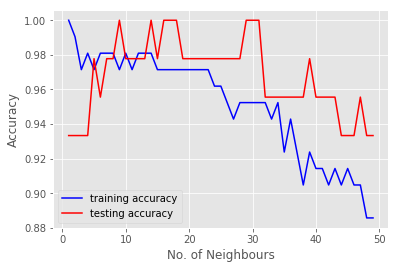

In [143]:
plt.plot(k, accuracy_train, label='training accuracy', color='blue')
plt.plot(k, accuracy_test, label='testing accuracy', color='red')
plt.ylabel('Accuracy')
plt.xlabel('No. of Neighbours')
plt.legend()

One can see from the above plot that although the accuracy on the training data increases as we increase increase the complexity of the model the accuracy on the testing data has a sweet spot somewhere in the middle. This is because the model is overfitting at high complexity and fitting to the noise in the training dataset, making it very accurate on that particular dataset but less accurate for other data.

### In Regression

All of what we have discussed also applied to regression.

If we look at the below image taken from [here](https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb) where the line is the model fitted to the blue training data and the red points are the testing data one can see that when the model is underfitting both the training and testing data receives a bad score, when the model is overfitting it receives a good score for the training data and a bad score for the validation score. 

The score here is the [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) i.e. i.e. $R^2 = 1-\dfrac{SS_{res}}{SS_{tot}}$ [one minus the sum of squares of the residuals ($SS_{res} = \sum_i (y_i - f_i)^2 = \sum_i e_i^2$) divided by the total sum of squares ($SS_{tot} = \sum_i (y_i - \bar{y})^2$)].

![Under- and Over- fitting in regression](imgs/regression_under_over_fitting.png)

The model on the left *underfits* the data, it does not have enough model flexibility to suitably account for all the features in the data; another way of saying this is that the model has **high bias**.

The model on the right *overfits* the data, it has so much flexibility in the model that it is more sensitive to the particular noise in the data than the general features. The model has so much flexibility that the model ends up accounting for random errors as well as the underlying data distribution; another way of saying this is that the model has **high variance**.

* For **high-bias** models (*underfitted*), the performance of the model on the validation set is similar to the performance on the training set.
* For **high-variance** models (*overfitted*), the performance of the model on the validation set is far worse than the performance on the training set.

We can plot a **validation curve** for regression models similar to what we did for the K-NN model applied to the Iris data above.

![Validation curve for a regression model](imgs/validation-curve.png)

This has a very similar shape to that we got for the classification model we performed above, as can be seen plotted again below with the x-axis inverted such that complexity increases as we go to the right (lower number of neighnours in k-NN model = more complex model)

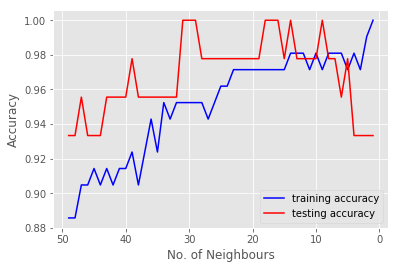

In [142]:
plt.plot(k, accuracy_train, label='training accuracy', color='blue')
plt.plot(k, accuracy_test, label='testing accuracy', color='red')
plt.ylabel('Accuracy')
plt.xlabel('No. of Neighbours')
plt.legend()
plt.gca().invert_xaxis()

<a id='regression'></a>
## Regression

We will now perform some regression to see how to use the tools of scikit-learn to analyse model complexity and performance with a regression model as opposed to a classification model.

First we'll generate some data, featuring Gaussian measurement noise, following a 2nd order polynomial distribution with only a single feature. 

In [625]:
def make_data(n_data_points, yerr_stddev, a, b, c, low=0, high=200):
    X = np.random.uniform(size=n_data_points, low=low, high=high)
    y_true = a*X**2 + b*X + c
    y = y_true + np.random.normal(size=n_data_points, scale=yerr_stddev)
    return X[:, None], y

In [626]:
X, y = make_data(50, 60, 0.1, 3, 400)

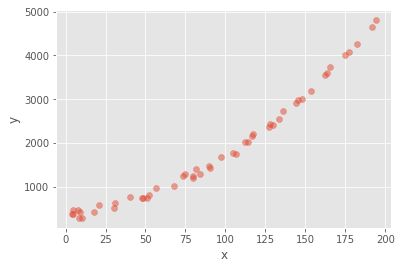

In [627]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

In [628]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [629]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22)

# we split the data into a training and testing set

In [630]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# In Scikit-Learn, we can implement a linear regression to fit a polynomial model to data with the polynomial preprocessor and linear regression. We will use a pipeline to string these operations together.

In [631]:
model = PolynomialRegression(2).fit(X_train, y_train)

# use 2nd order polynomial model and fit to training data

In [632]:
X_test, y_test = zip(*sorted(zip(X_test, y_test))) # sort testing data

In [633]:
y_pred = model.predict(X_test)

# predict on testing data

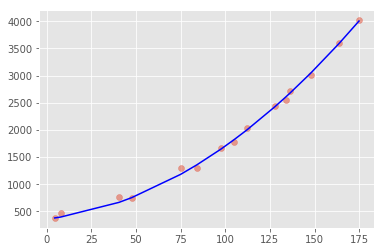

In [634]:
plt.scatter(X_test, y_test, alpha=0.5) # plot testing data
plt.plot(X_test, y_pred, color='blue') # plot predicted data

In [635]:
model.steps[1][1]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [636]:
model.steps[1][1].coef_ # get 2nd step of pipeline (the regression) which is a tuple of the step name and actual step and get the 2nd element - which is the actual linear regression object and then get the fitted coefficients from this

array([ 0.        ,  3.48311913,  0.09917326])

In [637]:
model.steps[1][1].intercept_ # as above but get the intercept rather than the coefficients

361.25589662675452

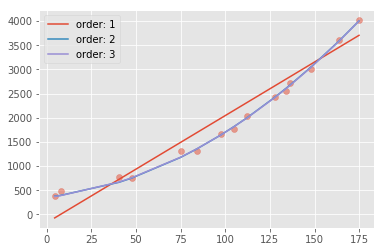

In [638]:
plt.scatter(X_test, y_test, alpha=0.5) # plot testing data
for o in range(1, 4):
    model = PolynomialRegression(o).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, label='order: {}'.format(o)) # plot predicted data
plt.legend()

In [639]:
def make_data(n_data_points, yerr_stddev, a, b, c, d, low=-200, high=200):
    X = np.random.uniform(size=n_data_points, low=low, high=high)
    y_true = a*X**3 + b*X*2 + c*X + d
    y = y_true + np.random.normal(size=n_data_points, scale=yerr_stddev)
    return X[:, None], y

In [663]:
X, y = make_data(35, 5000, 0.01, 2, 50, 3000)

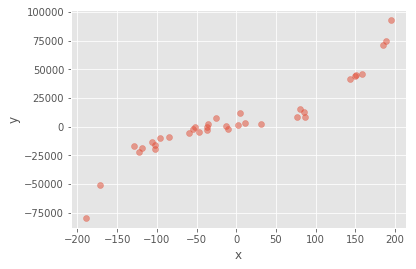

In [664]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

In [665]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.30, random_state=22)

In [666]:
X_test, y_test = zip(*sorted(zip(X_test, y_test))) # sort testing data

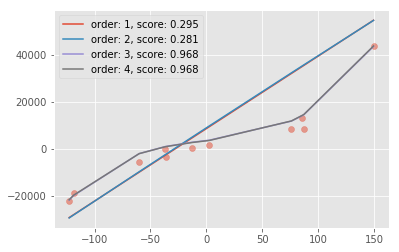

In [667]:
plt.scatter(X_test, y_test, alpha=0.5) # plot testing data
for o in range(1, 5):
    model = PolynomialRegression(o).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    plt.plot(X_test, y_pred, label='order: {}, score: {:.3f}'.format(o, score)) # plot predicted data
plt.legend()

In [668]:
model.steps[1][1].coef_ # when the model is higher order the score does not improve from the higher dimensionality and the regression predicts the coefficient for the x^4 term to be ~0 which makes sense, since it is 0

array([  0.00000000e+00,   5.53701124e+01,  -3.19596907e-03,
         9.78220609e-03,  -9.59915077e-07])

A useful question to answer is this: what degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)?

We can make progress in this by visualizing the validation curve for this particular data and model; this can be done straightforwardly using the validation_curve convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:

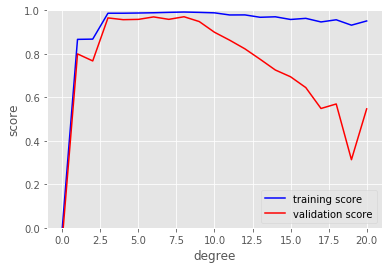

In [669]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

This shows precisely the qualitative behavior we expect: the training score is everywhere higher than the validation score; the training score is monotonically improving with increased model complexity; and the validation score reaches a maximum before dropping off as the model becomes over-fit.

In [679]:
X, y = make_data(1000, 5000, 0.01, 2, 50, 3000)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.30, random_state=22)

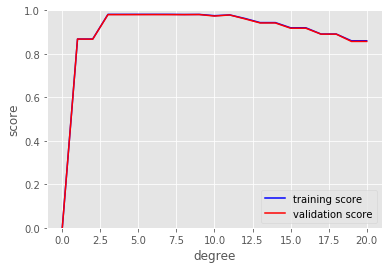

In [680]:
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

It is clear from this validation curve that a larger dataset allows a much more complicated model to fit well. Even a degree-20 model is not seriously over-fitting the data—the validation and training scores remain very close.


Thus we see that the behavior of the validation curve has not one but two important inputs: the model complexity and the number of training points. It is often useful to to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model. A plot of the training/validation score with respect to the size of the training set is known as a **learning curve**.

<a id='learning_curves'></a> 
### Learning Curves

The general behavior we would expect from a learning curve is this:

A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

The learning curve for our linear regression problem for a 3rd order Polynomial fitted to our 3rd order polynomial noisy data is calculated and plotted below:

In [736]:
X, y = make_data(200, 10000, 0.01, 2, 50, 3000)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.30, random_state=22)

In [737]:
X_train.shape[0]

140

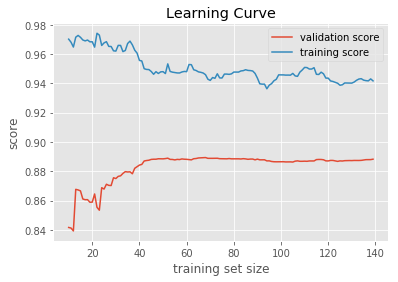

In [738]:
degree = 3

training_scores = []
testing_scores = []

training_set_size = range(10, X_train.shape[0], 1)

for i, N in enumerate(training_set_size):
    X_train_i = X_train[:N]
    y_train_i = y_train[:N]
    model = PolynomialRegression(degree).fit(X_train_i, y_train_i)
    training_scores.append(model.score(X_train_i, y_train_i))
    testing_scores.append(model.score(X_test, y_test))
    
plt.plot(training_set_size , testing_scores, label='validation score')
plt.plot(training_set_size , training_scores, label='training score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.xlabel('training set size')
plt.ylabel('score');

Ideally the learning curve should look something like that shown below.

![](imgs/learning-curve.png)

The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.

There is also a convenience function in scikit learn for calculating the learing curve of your model as we use below on the same data for a degree 2 and 9 model.

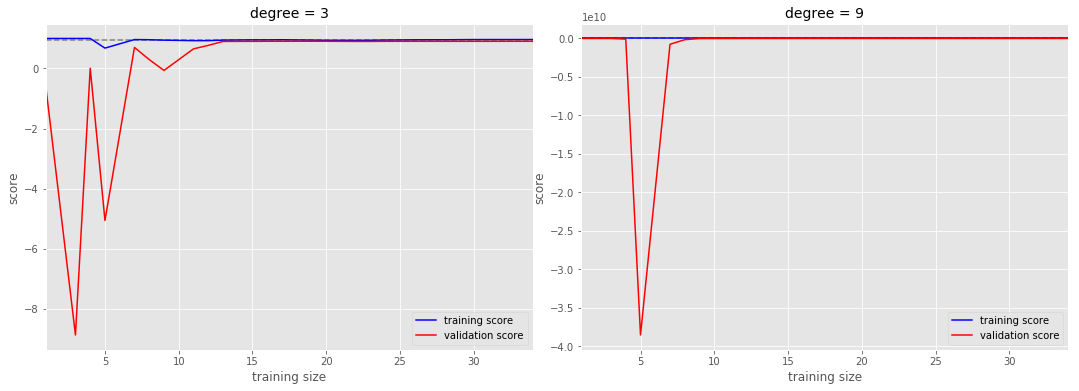

In [745]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([3, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.01, 0.2, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    #ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

### Validation in Practice: Grid Search